# Task # 5 To Explore Business Analytics

## Bezawada Ruchitha

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline
from sklearn import datasets
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


No Null values found, so we can move to the next part

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Correlation

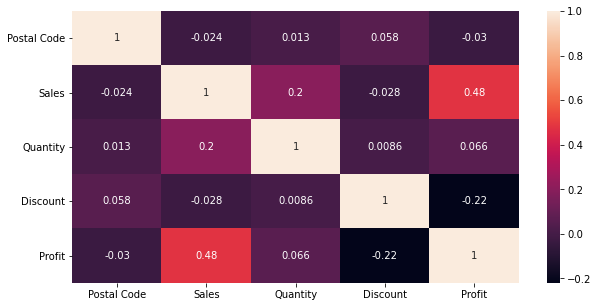

In [6]:
correlation=df.corr()
plt.figure(figsize=(10,5))
sea.heatmap(correlation,annot=True)

In [9]:
df2=df.drop(['Country','Postal Code','Quantity','Discount'],axis=1)
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.5164


## Visualisation

Text(0.5, 1.0, 'Category -- Region wise')

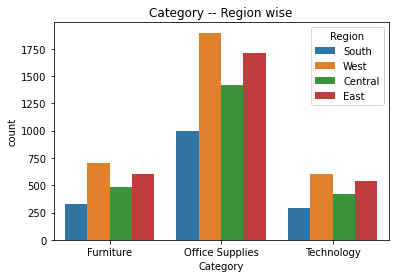

In [10]:
sea.countplot(x='Category',hue='Region',data=df2)
plt.title("Category -- Region wise")

Text(0.5, 1.0, 'Sub-Category -- Region wise')

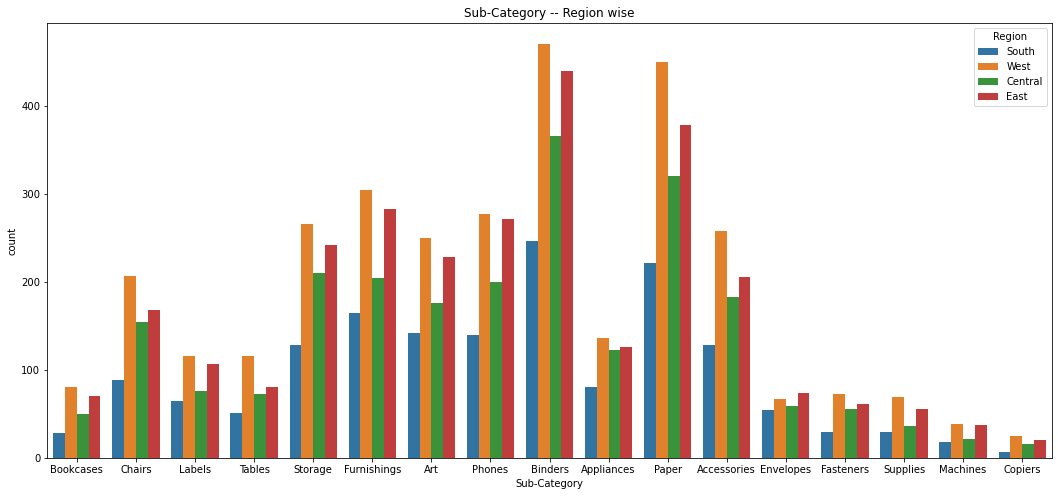

In [11]:
plt.figure(figsize=(18,8))
sea.countplot(x='Sub-Category',hue='Region',data=df2)
plt.title("Sub-Category -- Region wise")

Text(0.5, 1.0, 'Sales Vs Profits -- Segment wise')

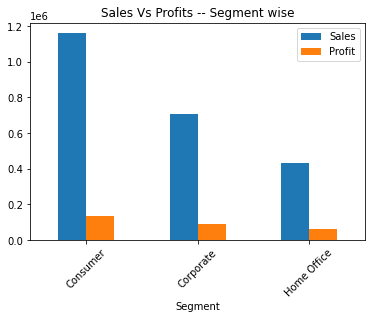

In [12]:
df2.groupby(['Segment']).sum()[['Sales','Profit']].plot.bar()
plt.xticks(rotation=45)
plt.title("Sales Vs Profits -- Segment wise")

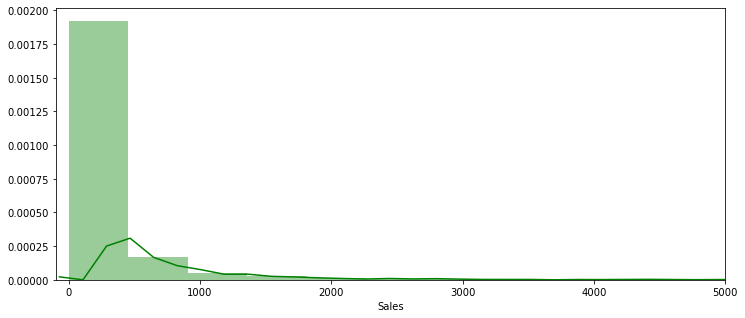

In [13]:
plt.figure(figsize=(12,5))
sns.distplot(df['Sales'],color='g')
plt.xlim(-100,5000)
plt.show()

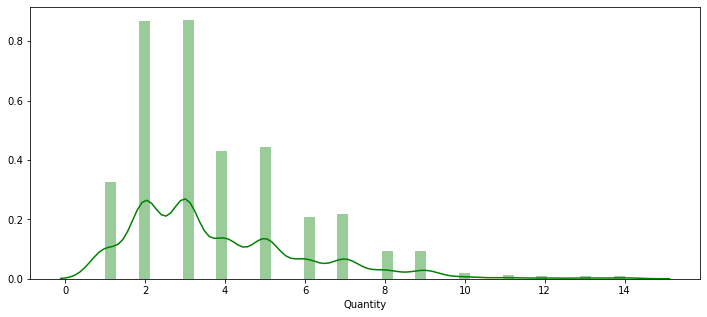

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(df['Quantity'], color= 'green')
plt.show()

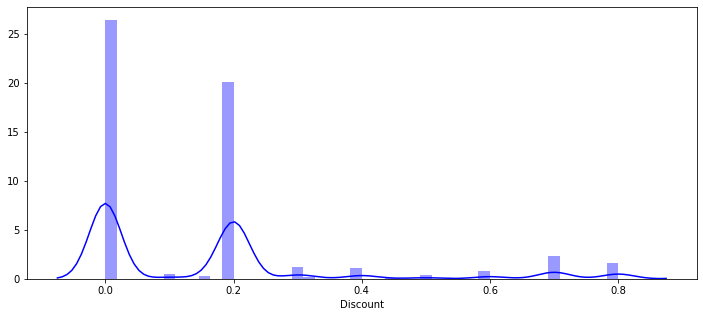

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(df['Discount'], color= 'blue')
plt.show()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


Text(0.5, 1.0, 'Percentage of sales in diff Regions of USA')

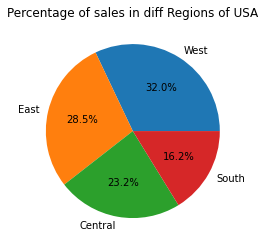

In [17]:
#Visualizing Region
theme = plt.get_cmap('hsv')
print(df['Region'].value_counts())
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales in diff Regions of USA')

Maximum sales were in "West Region"

Minimum sales were in "South Region"

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


Text(0.5, 1.0, 'Percentage of sales for different categories')

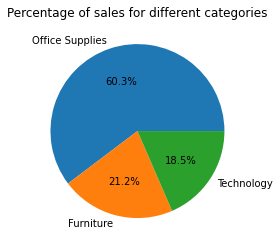

In [18]:
#Visualizing Category
print(df['Category'].value_counts())
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of sales for different categories')

Most selling category is "Office supllies"

Least selling category is "Technolgy"

In [20]:
corr = df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


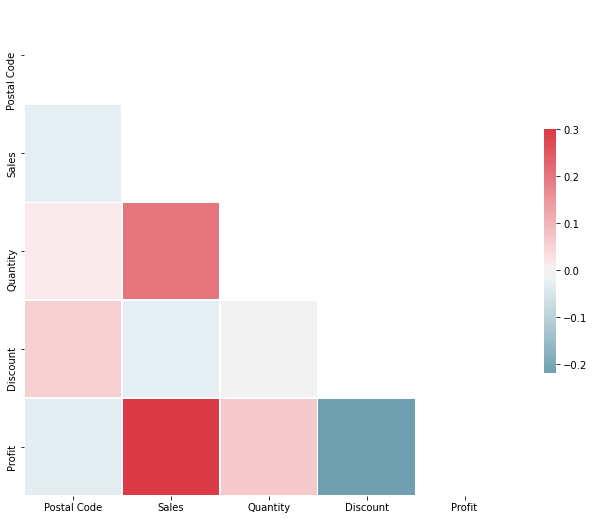

In [21]:
# Let us get the correlation in the data
import numpy as np
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

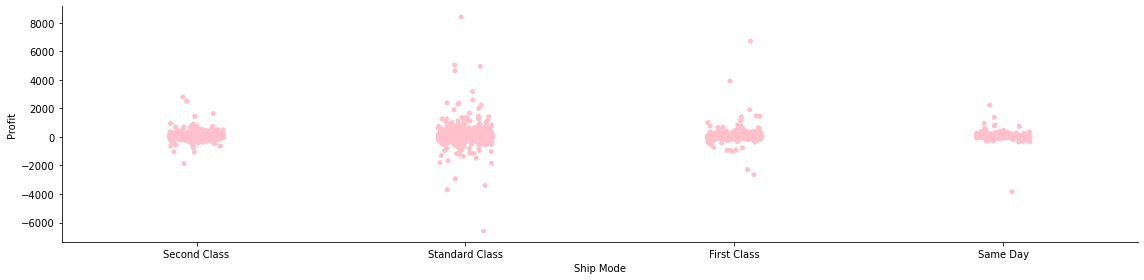

In [23]:
sns.catplot(x="Ship Mode", y="Profit", data=df, color='pink', height=4, aspect=4);

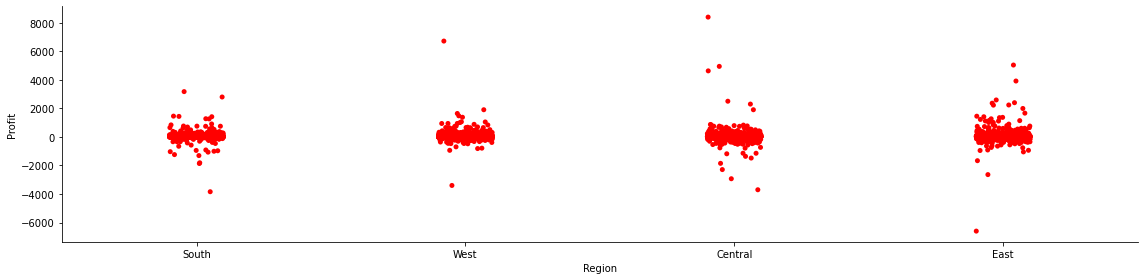

In [24]:
sns.catplot(x="Region", y="Profit", data=df, color='Red', height=4, aspect=4);

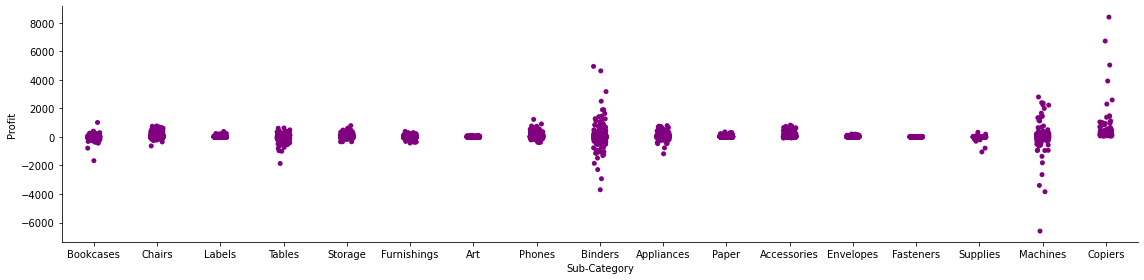

In [26]:
sns.catplot(x="Sub-Category", y="Profit", data=df, color='Purple', height=4, aspect=4);

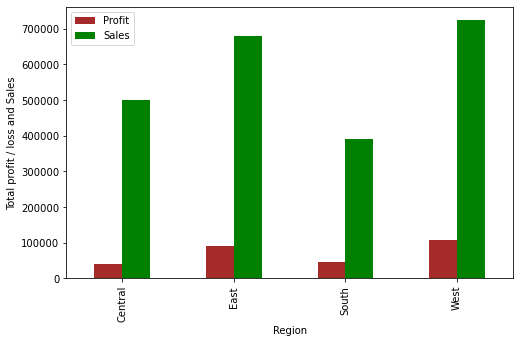

In [28]:
#Region wise analysis of profit and sales
df.groupby('Region')[['Profit', 'Sales']].sum().plot.bar(color = ["brown", "green"],figsize= (8,5))
plt.ylabel("Total profit / loss and Sales")
plt.show()

## Conclusion

It can be concluded that Binders are higly variable and Copiers earn the maximum Profit.
Profit and Sales are related to each other but the proportion is not very uniforn.Hence we should to work on both sales and profit seperately to increase them.
